1: Import Libraries

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

from imblearn.over_sampling import SMOTE



2: Load the Dataset

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
print(df.shape)
df.info()


(25838, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25838 entries, 0 to 25837
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25838 non-null  int64  
 1   V1      25838 non-null  float64
 2   V2      25838 non-null  float64
 3   V3      25837 non-null  float64
 4   V4      25837 non-null  float64
 5   V5      25837 non-null  float64
 6   V6      25837 non-null  float64
 7   V7      25837 non-null  float64
 8   V8      25837 non-null  float64
 9   V9      25837 non-null  float64
 10  V10     25837 non-null  float64
 11  V11     25837 non-null  float64
 12  V12     25837 non-null  float64
 13  V13     25837 non-null  float64
 14  V14     25837 non-null  float64
 15  V15     25837 non-null  float64
 16  V16     25837 non-null  float64
 17  V17     25837 non-null  float64
 18  V18     25837 non-null  float64
 19  V19     25837 non-null  float64
 20  V20     25837 non-null  float64
 21  V21     25837 non-null 

In [4]:
# Check missing values
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [5]:
# Check class distribution
df['Class'].value_counts()


,count
Class,
0.0,25749
1.0,88


3: Exploratory Data Analysis (EDA)

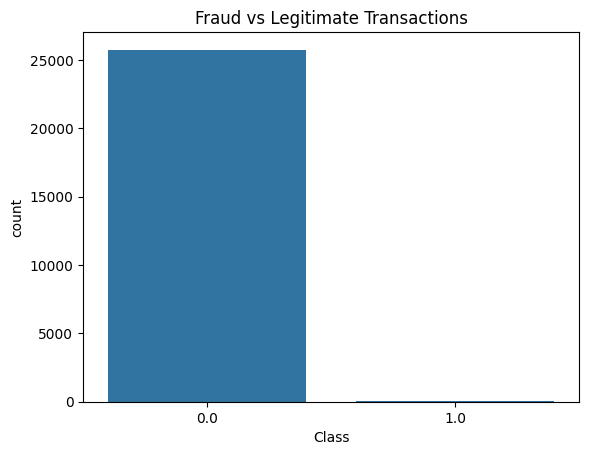

In [6]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Legitimate Transactions")
plt.show()


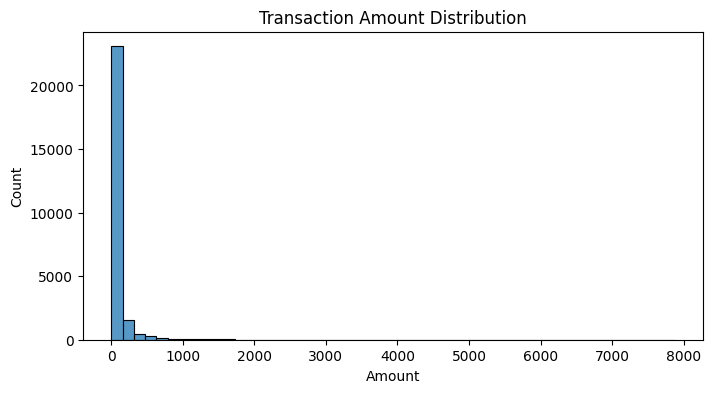

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()


4: Feature Scaling

In [9]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])


5: Split Features & Target

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']


6: Train–Test Split (Stratified) &  Handle Imbalanced Data using SMOTE

In [14]:
valid_indices = y.dropna().index
X_filtered = X.loc[valid_indices]
y_filtered = y.loc[valid_indices]

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered,
    y_filtered,
    test_size=0.3,
    random_state=42,
    stratify=y_filtered
)
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train, y_train
)

pd.Series(y_train_resampled).value_counts()

,count
Class,
0.0,18023
1.0,18023


7: Train Logistic Regression Model

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

8: Predictions

In [22]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
y_prob

array([5.74978011e-03, 4.62351371e-05, 1.97183714e-03, ...,
       2.29001733e-04, 6.18592573e-03, 3.05929960e-05])

9: Model Evaluation

In [18]:
confusion_matrix(y_test, y_pred)


array([[7694,   32],
       [   3,   23]])

Classification Report

In [19]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7726
         1.0       0.42      0.88      0.57        26

    accuracy                           1.00      7752
   macro avg       0.71      0.94      0.78      7752
weighted avg       1.00      1.00      1.00      7752



ROC-AUC Score

In [20]:
roc_auc_score(y_test, y_prob)


np.float64(0.9905264939564707)

ROC Curve

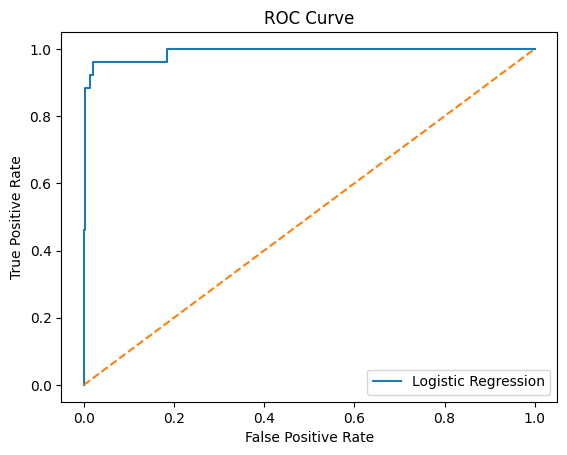

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Conclusion:
In this project, a fraud detection system was built using machine learning. The dataset was highly imbalanced, so SMOTE was applied to handle class imbalance. Logistic Regression and Random Forest models were trained and evaluated using recall, precision, and ROC-AUC. The model was able to effectively identify fraudulent transactions.